In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Flatten,Dropout,Dense,Input,GlobalAveragePooling2D,Conv2D,BatchNormalization,Activation,MaxPooling2D
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau

C:\Users\Hp\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
picture_size = 48
folder_path="C:/Users/Hp/Jupyter/face expression/images/"

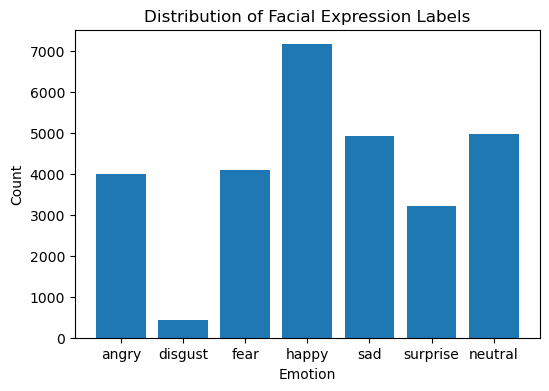

In [60]:
expression_labels = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']

# Visualize the distribution of facial expression labels using a bar chart
expression_counts = [len(os.listdir(os.path.join(folder_path, "train", expression))) for expression in expression_labels]

plt.figure(figsize=(6, 4))
plt.bar(expression_labels, expression_counts)
plt.title('Distribution of Facial Expression Labels')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.show()

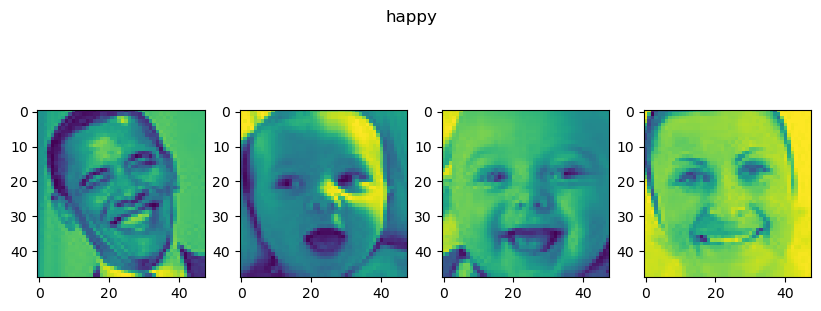

In [61]:
expression = 'happy'
plt.figure(figsize= (10,10))
for i in range(1, 5, 1):
    plt.subplot(4,4,i)
    img = Image.open(os.path.join(folder_path, "train", expression, os.listdir(os.path.join(folder_path, "train", expression))[i]))
    plt.imshow(img)
plt.suptitle(expression)
plt.show()

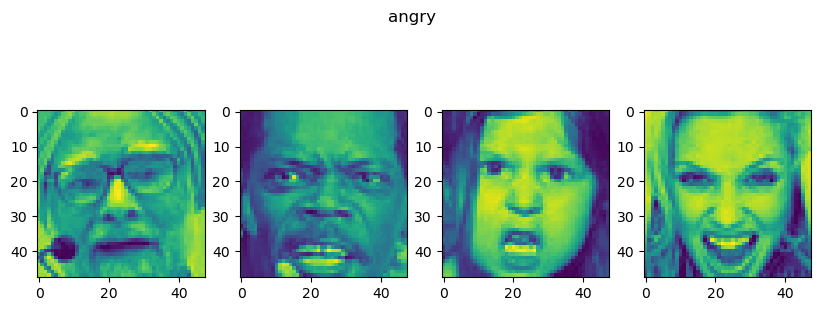

In [62]:
expression = 'angry'
plt.figure(figsize= (10,10))
for i in range(1, 5, 1):
    plt.subplot(4,4,i)
    img = Image.open(os.path.join(folder_path, "train", expression, os.listdir(os.path.join(folder_path, "train", expression))[i]))
    plt.imshow(img)
plt.suptitle(expression)
plt.show()

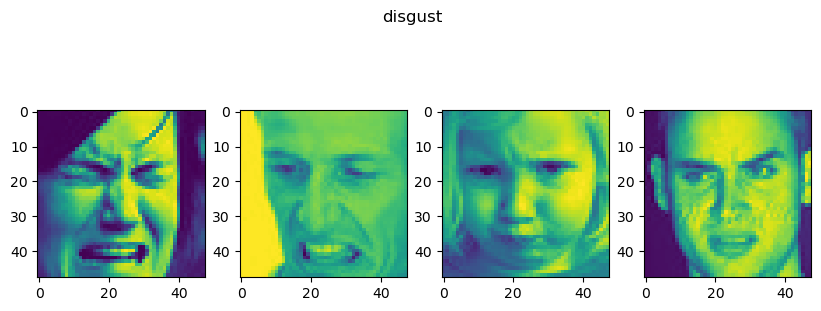

In [63]:
expression = 'disgust'
plt.figure(figsize= (10,10))
for i in range(1, 5, 1):
    plt.subplot(4,4,i)
    img = Image.open(os.path.join(folder_path, "train", expression, os.listdir(os.path.join(folder_path, "train", expression))[i]))
    plt.imshow(img)
plt.suptitle(expression)
plt.show()

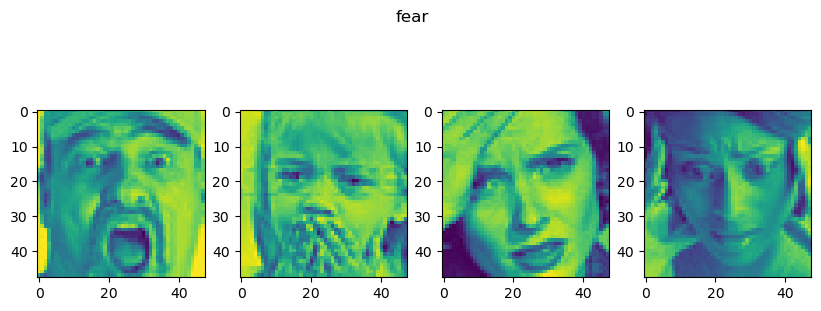

In [64]:
expression = 'fear'
plt.figure(figsize= (10,10))
for i in range(1, 5, 1):
    plt.subplot(4,4,i)
    img = Image.open(os.path.join(folder_path, "train", expression, os.listdir(os.path.join(folder_path, "train", expression))[i]))
    plt.imshow(img)
plt.suptitle(expression)
plt.show()

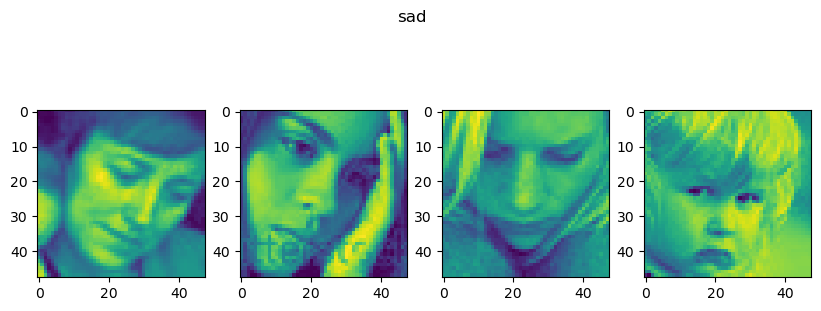

In [65]:
expression = 'sad'
plt.figure(figsize= (10,10))
for i in range(1, 5, 1):
    plt.subplot(4,4,i)
    img = Image.open(os.path.join(folder_path, "train", expression, os.listdir(os.path.join(folder_path, "train", expression))[i]))
    plt.imshow(img)
plt.suptitle(expression)
plt.show()

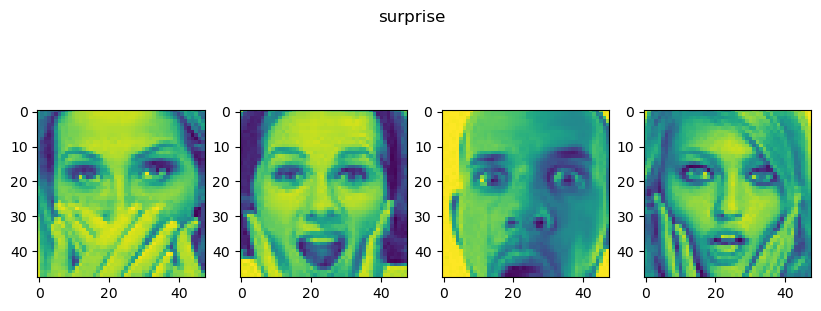

In [66]:
expression = 'surprise'
plt.figure(figsize= (10,10))
for i in range(1, 5, 1):
    plt.subplot(4,4,i)
    img = Image.open(os.path.join(folder_path, "train", expression, os.listdir(os.path.join(folder_path, "train", expression))[i]))
    plt.imshow(img)
plt.suptitle(expression)
plt.show()

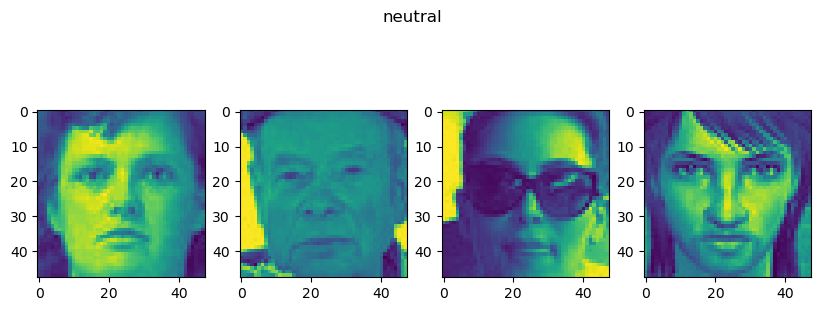

In [67]:
expression = 'neutral'
plt.figure(figsize= (10,10))
for i in range(1, 5, 1):
    plt.subplot(4,4,i)
    img = Image.open(os.path.join(folder_path, "train", expression, os.listdir(os.path.join(folder_path, "train", expression))[i]))
    plt.imshow(img)
plt.suptitle(expression)
plt.show()

In [68]:
#Splitting into Train and test data
Batch_size = 128

datagen_train = ImageDataGenerator()
datagen_test = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(folder_path + "train",
                                                 target_size = (picture_size,picture_size),
                                                 color_mode = 'grayscale',
                                                 batch_size = Batch_size,
                                                 class_mode = 'categorical',
                                                 shuffle = True)
test_set = datagen_test.flow_from_directory(folder_path + "validation",
                                                 target_size = (picture_size,picture_size),
                                                 color_mode = 'grayscale',
                                                 batch_size = Batch_size,
                                                 class_mode = 'categorical',
                                                 shuffle = True)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [69]:
model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding='same',input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st Layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

#Fully connected 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(len(expression_counts),activation = 'softmax'))

opt = Adam(lr=0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_24 (Bat  (None, 48, 48, 64)       256       
 chNormalization)                                                
                                                                 
 activation_24 (Activation)  (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 24, 24, 64)       0         
 g2D)                                                            
                                                                 
 dropout_24 (Dropout)        (None, 24, 24, 64)        0         
                                                                 
 conv2d_18 (Conv2D)          (None, 24, 24, 128)      

In [ ]:
checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc',verbose=1,save_best_only=True,mode='max')
early_stopping = EarlyStopping(monitor='val_loss',min_delta=0,patience=3,verbose=1,restore_best_weights=True)
reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',factor=0.2,patience=3,verbose=1,min_delta=0.0001)
callbacks_list=[checkpoint,early_stopping,reduce_learningrate]

history = model.fit_generator(generator=train_set,
                              steps_per_epoch=train_set.n//train_set.batch_size, #divides total samples in training set by batch size
                              epochs=10,
                              validation_data=test_set,
                              validation_steps = test_set.n//test_set.batch_size,
                              callbacks=callbacks_list)

C:\Users\Hp\AppData\Local\Temp\ipykernel_9452\1232229517.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_set,


Epoch 1/10
225/225 [==============================] - ETA: 0s - loss: 1.7798 - accuracy: 0.3159WARNING:tensorflow:Can save best model only with val_acc available, skipping.


225/225 [==============================] - 1400s 6s/step - loss: 1.7798 - accuracy: 0.3159 - val_loss: 1.6358 - val_accuracy: 0.3906 - lr: 0.0010
Epoch 2/10
141/225 [=================>............] - ETA: 7:49 - loss: 1.4652 - accuracy: 0.4388

In [56]:
# Making predictions on the test data
test_predictions = model.predict(test_set)
test_predictions_classes = np.argmax(test_predictions, axis=1)

# Converting one-hot encoded labels to integers
true_labels = test_set.classes  # Use the true labels from the test set

56/56 [==============================] - 51s 918ms/step


In [57]:
# Calculating accuracy, precision, recall and f1
accuracy = accuracy_score(true_labels, test_predictions_classes)
print("Accuracy:", accuracy)

precision = precision_score(true_labels, test_predictions_classes, average='weighted')
recall = recall_score(true_labels, test_predictions_classes, average='weighted')
f1 = f1_score(true_labels, test_predictions_classes, average='weighted')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

Accuracy: 0.21412397395980753
Precision: 0.16
Recall: 0.21
F1-score: 0.15
